In [12]:
%matplotlib notebook 
#%matplotlib inline
from mpl_toolkits.mplot3d import axes3d
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm 
import matplotlib.animation as anim
#from IPython.display import HTML

In [13]:
class Particle():
    
    # init
    def __init__(self, r0,v0,a0,t,m,radius,Id):
        
        self.dt  = t[1] - t[0]
        self.t = t

        self.r = r0
        self.v = v0
        self.a = a0
        
        self.rVector = np.zeros( (len(t),len(r0)) )
        self.vVector = np.zeros( (len(t),len(v0)) )
        self.aVector = np.zeros( (len(t),len(a0)) )
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
    # Method
    def Evolution(self,i):
        
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        
       # print(self.r)
        
        # Euler method
        self.r += self.dt * self.v
        self.v += self.dt * self.a
    def CheckWallLimits(self, limits, dim = 3):
        
        for i in range(dim):
            if self.r[i] + self.radius > limits [i] and self.v[i] >0:
                self.v[i] = -self.v[i]              
            if self.r[i] - self.radius < -limits[i] and self.v[i]<0:
                self.v[i] = -self.v[i]

    # Setters
    
    def SetPosition(self,i,r):
        self.rVector[i] = r
        
    def SetVelocity(self,i,v):
        self.vVector[i] = v
        
    # Getters  
    def GetPositionVector(self):
        return self.rVector

    def GetRPositionVector(self):
        return self.RrVector
    
    def GetRVelocityVector(self):
        return self.RvVector

    def GetVelocityVector(self):
        return self.vVector
    
    def GetR(self):
        return self.radius
    def ReduceSize(self,factor):
        
        self.RrVector = np.array([self.rVector[0]]) # initial condition
        self.RvVector = np.array([self.vVector[0]]) # Vector de velocidad reducido        
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])
                self.RvVector = np.vstack([self.RvVector,self.vVector[i]])

In [14]:
# Discretization
dt = 0.01
tmax = 15
t = np.arange(0,tmax+dt,dt)
NParticles=100

In [15]:
def GetParticles(NParticles,Limit,Velocity,Dim=3,dt=0.01):
    
    Particles_ = []
    
    for i in range(NParticles):
        
        #Se ponen las condiciones iniciales de posición, velocidad y aceleración

        x0 = np.random.uniform( -Limit+1.0, Limit-1.0, size=Dim )
        v0 = np.random.uniform( -Velocity, Velocity, size=Dim)
        a0 = np.zeros(Dim)
        
        p = Particle(x0,v0,a0,t,1.,2.5,i) #Se modela como partículas de masa m=1 y radio r=1
        
        Particles_.append(p)
        
    return Particles_

In [16]:
Limits = np.array([10.,10.,10.])

In [17]:
def RunSimulation(t,NParticles, Velocity):
    
    Particles = GetParticles(NParticles,Limits[0], Velocity=Velocity,dt=dt)
    
    for it in tqdm(range(len(t))): # Evolucion temporal
        for i in range(len(Particles)):
            
            Particles[i].CheckWallLimits(Limits)
            Particles[i].Evolution(it)
        
        
    return Particles
#p_0 = np.array([-15.,-5.]) #vector posicion inicial
#v_0 = np.array([1.,0.]) #vector velocidad inicial

In [18]:
Particles = RunSimulation(t,30,Velocity=50)

100%|██████████| 1501/1501 [00:00<00:00, 2211.25it/s]


In [19]:
len(Particles[0].GetPositionVector())

1501

In [20]:
def ReduceTime(t,factor):
    
    for p in Particles:
        p.ReduceSize(factor)
        
    Newt = []
    
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])
            
    return np.array(Newt)

In [21]:
redt = ReduceTime(t,10)
len(Particles[0].GetRPositionVector())

151

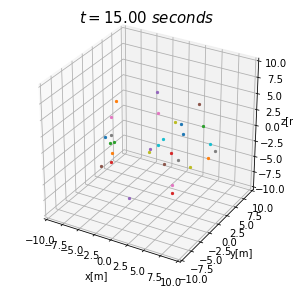

In [22]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes(projection = '3d')



def init():
    ax.set_xlim(-Limits[0],Limits[0])
    ax.set_ylim(-Limits[1],Limits[1])
    ax.set_zlim(-Limits[2],Limits[2])
    ax.set_xlabel("x[m]")
    ax.set_ylabel("y[m]")
    ax.set_zlabel("z[m]")

def Update(i):
    
    plot = ax.clear()
    init()
    plot = ax.set_title(r'$t=%.2f \ seconds$' %(redt[i]), fontsize=15)

    
    for p in Particles:
        x = p.GetRPositionVector()[i,0]
        y = p.GetRPositionVector()[i,1]
        z = p.GetRPositionVector()[i,2]

        ax.scatter(x, y, z, zdir = 'z', s = 2*p.GetR())


    return plot

Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init)

#Writer = anim.writers['ffmpeg']
#HTML(Animation.to_html5_video())
